# Clustering Jugadores de Campo

In [1]:
# Paquetería
import pandas as pd

## K-Means
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA
import plotly.express as px

# dbscan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score


# Jerarquica
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Gausian Mixture Models
from sklearn.mixture import GaussianMixture


In [2]:
# Funciones a usar

def apply_one_hot_encoding(df):
    """
    Aplica la codificación One-Hot a todas las columnas no numéricas de un DataFrame.

    Parámetros:
        df (pandas.DataFrame): DataFrame a transformar.

    Retorna:
        pandas.DataFrame: DataFrame con codificación One-Hot aplicada a las columnas no numéricas.
    """
    # Identificar las columnas no numéricas
    non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

    # Aplicar One-Hot Encoding
    df_encoded = pd.get_dummies(df, columns=non_numeric_columns)

    return df_encoded

# Uso de la función:
# Supongamos que df es tu DataFrame que ya has cargado.
# df_encoded = apply_one_hot_encoding(df)


In [3]:
Data_Players_noGK = pd.read_csv('C:/Users/rsier/Desktop/MASTERS/LaSalle - MUDS/TFM/Data/Def_Data/Players_noGK_data.csv')
Data_Players_noGK.head(5)

Season_End_Year   Squad     Comp           Player Nation Pos  Age  \
0             2018  Alavés  La Liga           Alexis    ESP  DF   31   
1             2018  Alavés  La Liga  Alfonso Pedraza    ESP  MF   21   
2             2018  Alavés  La Liga    Álvaro Medrán    ESP  MF   23   
3             2018  Alavés  La Liga           Burgui    ESP  MF   23   
4             2018  Alavés  La Liga   Carlos Vigaray    ESP  DF   22   

   Min_Playing.Time_Generales  Min_percent_Playing.Time_Generales  \
0                        2184                                63.9   
1                        2440                                71.3   
2                         947                                27.7   
3                        1034                                30.2   
4                         895                                26.2   

   onxG_Team.Success..xG._Generales  ...  Frac_Mid3rd_Touches_Transiciones  \
0                              26.4  ...                          0.397358   
1                              28.6  ...                          0.393826   
2                              10.7  ...                          0.665511   
3                              15.0  ...                          0.455338   
4                               6.8  ...                          0.461717   

   Frac_Att3rd_Touches_Transiciones  Frac_AttPen_Touches_Transiciones  \
0                          0.099593                          0.031504   
1                          0.401310                          0.075772   
2                          0.187175                          0.012132   
3                          0.453159                          0.052288   
4                          0.197216                          0.009281   

   Tkl+Int_Defensa  Att_Challenges_Defensa  Blocks_Blocks_Defensa  \
0               63                      45                     28   
1               89                      56                     39   
2               33                      21                      7   
3               17                       6                      5   
4               41                      16                      5   

   Frac_Def3rd_Tackles_Defensa  Frac_Mid3rd_Tackles_Defensa  \
0                     0.727273                     0.212121   
1                     0.421053                     0.368421   
2                     0.250000                     0.500000   
3                     0.200000                     0.400000   
4                     0.592593                     0.333333   

   Frac_Att3rd_Tackles_Defensa     Pos_2  
0                     0.060606  No Pos_2  
1                     0.210526        DF  
2                     0.250000  No Pos_2  
3                     0.400000        FW  
4                     0.074074  No Pos_2  

[5 rows x 66 columns]

## 1. K-Means

In [4]:
Data_Players_noGK_1 = Data_Players_noGK.copy()

In [5]:
# Seleccionar características
X_1_without_OHE = Data_Players_noGK_1.iloc[:, 5:66]
X_1 = apply_one_hot_encoding(X_1_without_OHE)

# Seleccionar la columna de etiquetas
y_1 = Data_Players_noGK_1.iloc[:, 0:4]

Encontrar el número ideal de grupos para dividir los datos es una etapa básica en cualquier algoritmo no supervisado. Una de las técnicas más comunes para calcular este valor ideal de k es el método del codo.

In [6]:
sse = [] #SUM OF SQUARED ERROR

for k in range(11,30):
    km = KMeans(n_clusters=k, random_state=410)
    km.fit(X_1)
    sse.append(km.inertia_)

c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

Trazar el gráfico del codo para encontrar el número óptimo de grupos

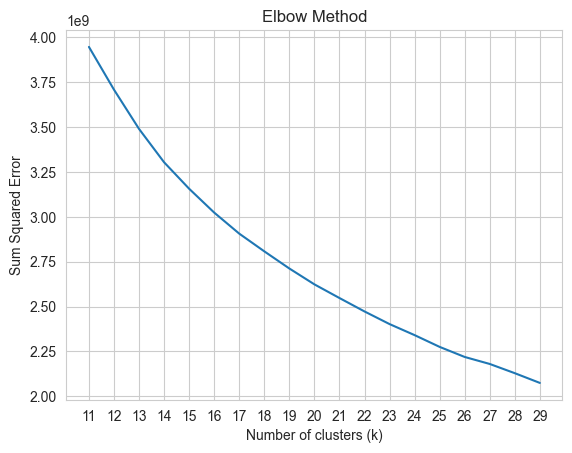

In [7]:
sns.set_style("whitegrid")

# Suponiendo que 'sse' es tu lista o array de Sum Squared Error
g = sns.lineplot(x=range(11, 30), y=sse)

g.set(xlabel="Number of clusters (k)",
      ylabel="Sum Squared Error",
      title='Elbow Method')

# Configurar los ticks del eje x para mostrar todos los números enteros en el rango
plt.xticks(range(11, 30))

plt.show()

Calculamos el "silhouette scores" para decretear el menor numero de cluster con menor indice.

c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

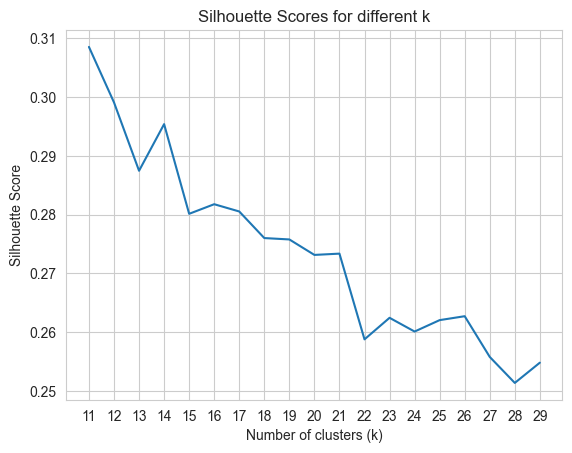

In [8]:
silhouette_scores = []

for k in range(11, 30):  # Silhouette score no se puede calcular para k = 1
    km = KMeans(n_clusters=k, random_state=410)
    labels = km.fit_predict(X_1)
    score = silhouette_score(X_1, labels)
    silhouette_scores.append(score)

sns.lineplot(x=range(11, 30), y=silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.xticks(range(11, 30))
plt.show()

In [9]:
# Construya el modelo de agrupación en clústeres de Kmeans
kmeans = KMeans(n_clusters = 14, random_state = 410)
kmeans.fit(X_1)

# Predecir el grupo de clústeres:
pred = kmeans.fit_predict(X_1)


c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


¿Coinciden los clústers con las posiciones?

In [10]:
clusters_KMeans = pd.Series(pred)
# Resetear índices en df si has hecho operaciones que alteran sus filas
Data_Players_noGK_1.reset_index(drop=True, inplace=True)
# Asegurarte de que pred_series también tiene un índice que coincide con df
clusters_KMeans = pd.Series(pred, index=Data_Players_noGK_1.index)

Data_Players_noGK_1['Cluster - Kmeans'] = clusters_KMeans
# Data_Players_noGK[["Season_End_Year", "Squad", "Comp", "Player","Nation", "Pos", "Pos_2", "Cluster - Kmeans"]]

In [11]:
tabla_frecuencias = pd.crosstab(index=Data_Players_noGK_1['Pos'], columns=Data_Players_noGK_1['Cluster - Kmeans'], margins=True, margins_name='Total')

# Imprimir la tabla de frecuencias
print(tabla_frecuencias)

Cluster - Kmeans    0    1    2     3     4     5    6    7    8     9   10  \
Pos                                                                           
DF                226  347  146   444   616   476  224   49  283   557  348   
FW                379   51   31   198   342   671   72   17   14   286  212   
MF                187  233  107   405   572   461  151   35  165   498  252   
Total             792  631  284  1047  1530  1608  447  101  462  1341  812   

Cluster - Kmeans   11   12   13  Total  
Pos                                     
DF                184  294  400   4594  
FW                163  162  109   2707  
MF                221  300  273   3860  
Total             568  756  782  11161  


C:\Users\rsier\AppData\Local\Temp\ipykernel_17304\3918318933.py:11: UserWarning: 
The palette list has fewer values (9) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=var, hue='Cluster - Kmeans', data=Data_Players_noGK_1, palette=palette)


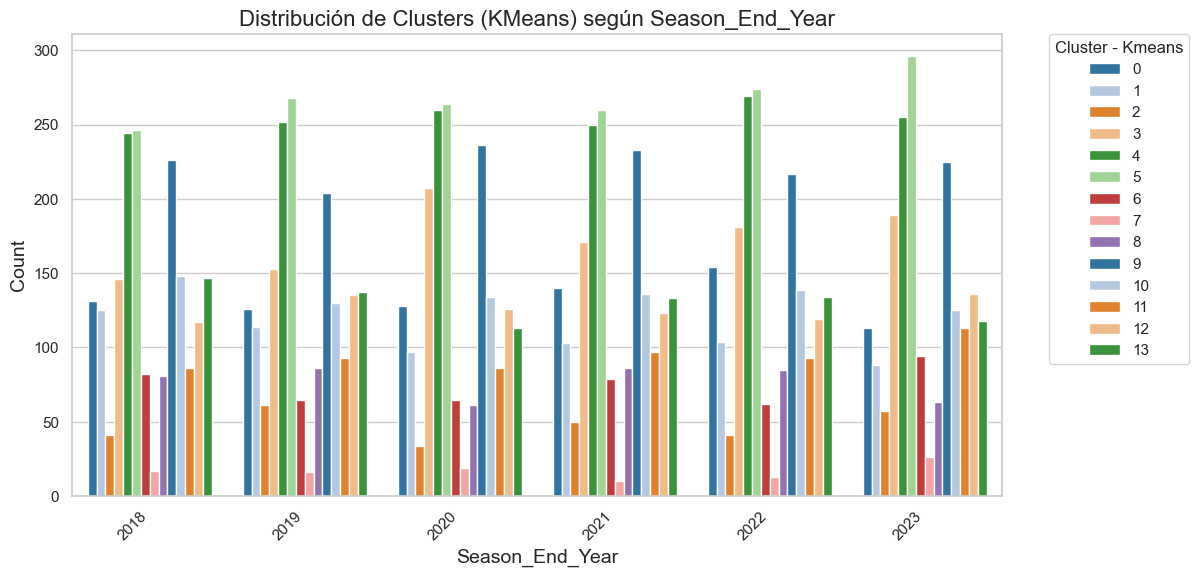

C:\Users\rsier\AppData\Local\Temp\ipykernel_17304\3918318933.py:11: UserWarning: 
The palette list has fewer values (9) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=var, hue='Cluster - Kmeans', data=Data_Players_noGK_1, palette=palette)


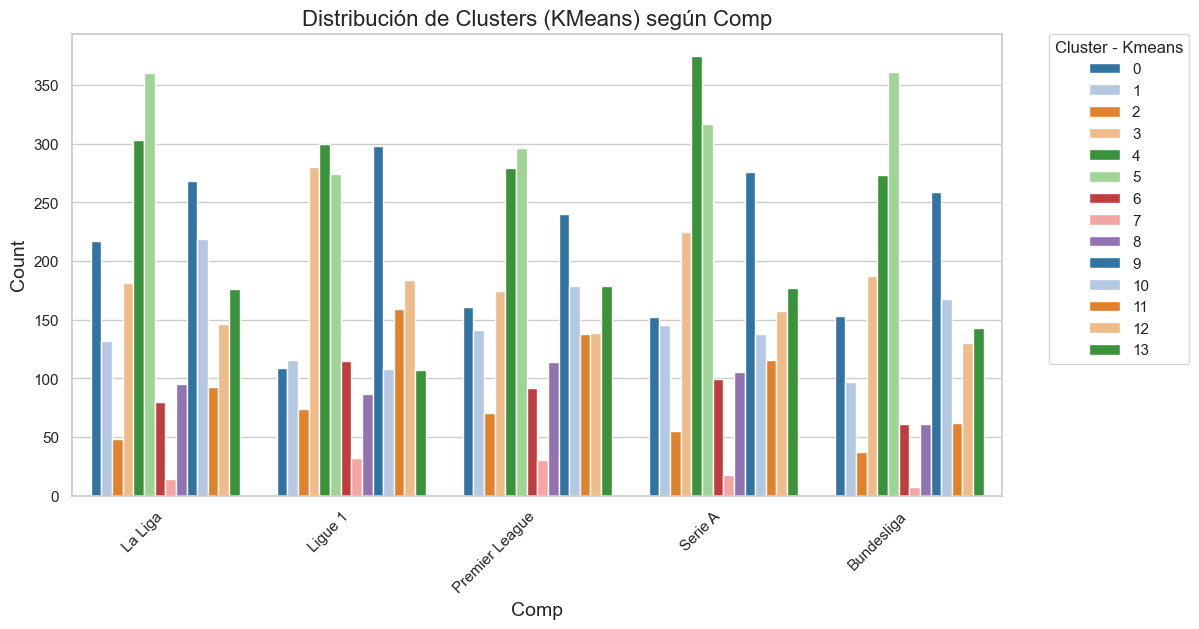

C:\Users\rsier\AppData\Local\Temp\ipykernel_17304\3918318933.py:11: UserWarning: 
The palette list has fewer values (9) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=var, hue='Cluster - Kmeans', data=Data_Players_noGK_1, palette=palette)


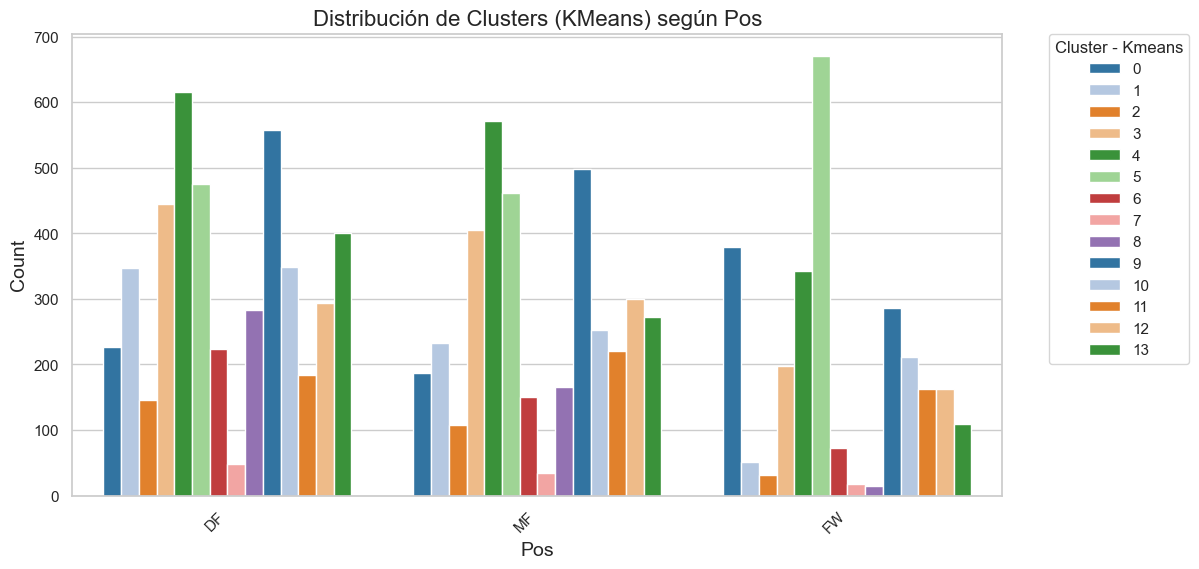

C:\Users\rsier\AppData\Local\Temp\ipykernel_17304\3918318933.py:11: UserWarning: 
The palette list has fewer values (9) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=var, hue='Cluster - Kmeans', data=Data_Players_noGK_1, palette=palette)


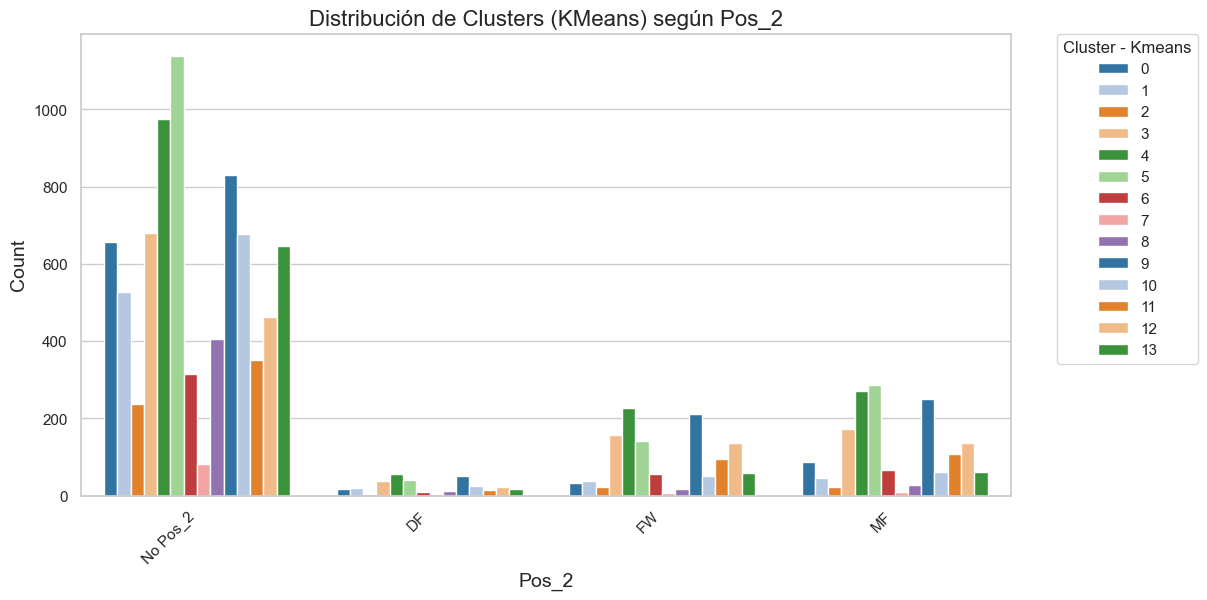

In [12]:
# Configurar el estilo y la paleta de colores
sns.set(style="whitegrid")
# Usando la paleta 'tab20' que proporciona hasta 20 colores diferenciados
palette = sns.color_palette("tab20", 9)  # Específicamente pedir 9 colores

# Lista de variables categóricas
variables = ['Season_End_Year', 'Comp', 'Pos', 'Pos_2']

for var in variables:
    plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura para mejor visualización
    ax = sns.countplot(x=var, hue='Cluster - Kmeans', data=Data_Players_noGK_1, palette=palette)
    plt.title(f'Distribución de Clusters (KMeans) según {var}', fontsize=16)
    plt.xticks(rotation=45, ha="right")  # Rotación con alineación a la derecha para mejor visualización
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Cluster - Kmeans', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Mover la leyenda fuera del gráfico
    plt.show()

In [13]:
# Data_Players_noGK

from IPython.display import display, HTML

# Asegurar que el DataFrame se muestre completamente en la salida de Jupyter
pd.set_option('display.max_rows', None)

# Agrupar por 'Cluster' y seleccionar 10 jugadores de cada uno, incluyendo el año de final de temporada
players_by_cluster = Data_Players_noGK_1.groupby('Cluster - Kmeans').apply(lambda x: x[['Player', 'Season_End_Year']].sample(n=min(10, len(x)))).reset_index()

# Eliminar el nivel adicional de índice introducido por sample
players_by_cluster = players_by_cluster.drop('level_1', axis=1)

players_by_cluster

Cluster - Kmeans                  Player  Season_End_Year
0                   0         Domingos Duarte             2022
1                   0      Leander Dendoncker             2019
2                   0              Maxi Gómez             2021
3                   0           Mads Pedersen             2022
4                   0      Abdoulaye Doucouré             2023
5                   0      Manuel Pucciarelli             2018
6                   0    Nicolas Isimat-Mirin             2020
7                   0           Enzo Crivelli             2019
8                   0              Pere Milla             2023
9                   0           Stefan Lainer             2022
10                  1     Matthias Zimmermann             2020
11                  1             Jaume Costa             2018
12                  1         Moussa Niakhate             2019
13                  1               Luke Shaw             2019
14                  1           Yeray Álvarez             2020
15                  1            David García             2023
16                  1              Robin Koch             2023
17                  1            Jules Koundé             2020
18                  1            Granit Xhaka             2023
19                  1             Aïssa Mandi             2020
20                  2         Dayot Upamecano             2022
21                  2          Joško Gvardiol             2023
22                  2            Robin Knoche             2019
23                  2        Mateusz Wieteska             2023
24                  2         Lorenzo Insigne             2020
25                  2             Willi Orban             2023
26                  2            Mats Hummels             2020
27                  2         Dayot Upamecano             2023
28                  2            Remo Freuler             2018
29                  2        Robin Le Normand             2022
30                  3            Sanjin Prcić             2018
31                  3            Fabian Schär             2020
32                  3     Ohis Felix Uduokhai             2018
33                  3          Andrea Petagna             2018
34                  3          Mitchell Dijks             2021
35                  3       Giorgio Chiellini             2021
36                  3         Charlie Daniels             2019
37                  3          Julian Ryerson             2023
38                  3         Kwon Chang-hoon             2018
39                  3        Jesper Lindstrøm             2022
40                  4                  Wakaso             2018
41                  4   Abdessamad Ezzalzouli             2022
42                  4            Jhon Córdoba             2018
43                  4          Édgar González             2020
44                  4        Emerson Palmieri             2019
45                  4              Marco John             2021
46                  4        Mirko Valdifiori             2019
47                  4               Léo Leroy             2022
48                  4         Mathías Olivera             2019
49                  4             Tyler Adams             2019
50                  5          Radamel Falcao             2022
51                  5       Jonathan Burkardt             2023
52                  5      Giancarlo González             2019
53                  5                  Sandro             2019
54                  5             Matěj Vydra             2022
55                  5          Luciano Vietto             2018
56                  5          Miguel Atienza             2021
57                  5            Raúl Jiménez             2023
58                  5           Kevin Paredes             2023
59                  5          Graziano Pellè             2021
60                  6                   Allan             2018
61                  6         Tommaso Augello             2021
62                  6           Azor

In [14]:
clusters_KMeans = Data_Players_noGK_1['Cluster - Kmeans']
players_KMeans = Data_Players_noGK_1['Player']
years_KMeans = Data_Players_noGK_1['Season_End_Year']
teams_KMeans = Data_Players_noGK_1['Squad']

# Escalar los datos
scaler = StandardScaler()
X_1_scaled = scaler.fit_transform(X_1)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_1_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster - Kmeans'] = clusters_KMeans
pca_df['Player'] = players_KMeans
pca_df['Season_End_Year'] = years_KMeans
pca_df['Team'] = teams_KMeans

# Visualizar los clusters
fig = px.scatter(
    pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    color='Cluster - Kmeans',
    color_continuous_scale=px.colors.qualitative.D3,  # Usa una paleta que pueda distinguir bien entre 15 clusters
    hover_data=['Player', 'Season_End_Year', 'Team'],  # Datos que aparecerán en el tooltip
    title='Visualization of Clusters using PCA'
)

fig.update_traces(marker=dict(size=8))  # Ajusta el tamaño de los puntos
fig.update_layout(legend=dict(title='Cluster - Kmeans', orientation="h", y=1.1, xanchor="center", x=0.5))  # Mejorar posición de la leyenda
fig.show()

## 2. DBSCAN

In [15]:
Data_Players_noGK_2 = Data_Players_noGK.copy()

In [16]:
# Seleccionar características sin aplicar one-hot encoding para no alterar la estructura espacial con variables categóricas
X_2_without_OHE = Data_Players_noGK_2.iloc[:, 5:66]
X_2 = apply_one_hot_encoding(X_2_without_OHE)

# Asegurarse de que se están utilizando los datos escalados
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)  # Asumimos datos no categóricos para simplificar

# Seleccionar la columna de etiquetas
y_2 = Data_Players_noGK_2.iloc[:, 0:4]

Modelado de datos utilizando DBSCAN 

In [17]:
# Asumiendo que X_scaled es tu conjunto de datos escalado
neighbors = NearestNeighbors(n_neighbors=2)  # 2 porque incluye el propio punto
neighbors_fit = neighbors.fit(X_2_scaled)
distances, indices = neighbors_fit.kneighbors(X_2_scaled)


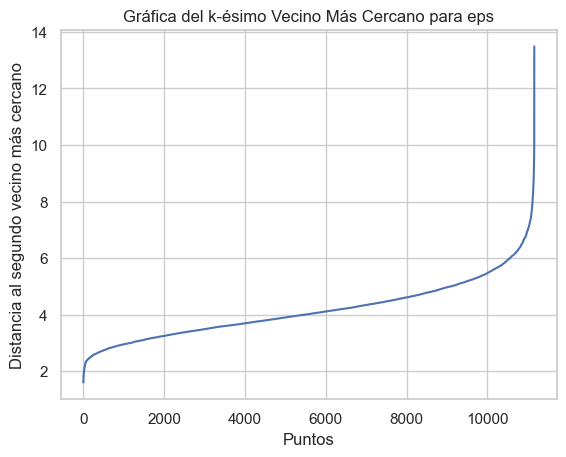

In [18]:
# Ordenar y graficar las distancias
sorted_distances = np.sort(distances[:, 1])  # el índice 1 es para el segundo vecino más cercano
plt.plot(sorted_distances)
plt.xlabel('Puntos')
plt.ylabel('Distancia al segundo vecino más cercano')
plt.title('Gráfica del k-ésimo Vecino Más Cercano para eps')
plt.show()

La elección de eps ideal generalmente ocurre en un punto justo antes de este aumento pronunciado, donde la distancia al segundo vecino más cercano aún es relativamente baja pero comienza a aumentar. Este punto a menudo se describe como el "codo" de la curva.

Probar eps cerca de 4, dado que cae antes del aumento extremo pero parece estar en la fase donde las distancias ya están comenzando a aumentar. Este valor puede ser un buen equilibrio entre capturar suficientes puntos en clusters y no agrupar demasiado los datos.

Ajustes Finos: Ajusta este valor ligeramente hacia arriba o hacia abajo para ver cómo afecta la configuración de los clusters. Por ejemplo, puedes probar valores en el rango de 3.5 a 4.5 para ver si alguno mejora la configuración de los clusters.

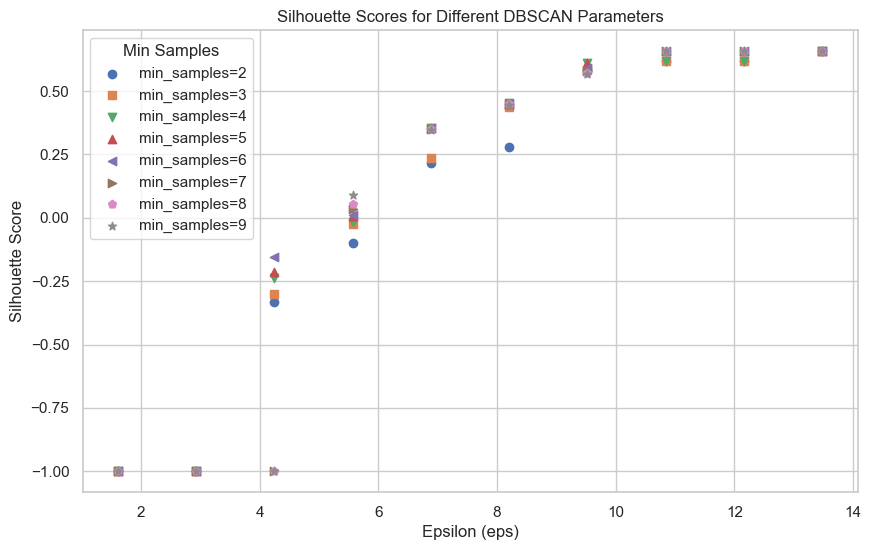

In [19]:
# Suponiendo que ya tienes X_2_scaled que es tu conjunto de datos escalado

# Definir rangos para los parámetros
eps_values = np.linspace(sorted_distances[0], sorted_distances[-1], num=10)
min_samples_values = range(2, 10)  # Rango típico para min_samples

# Almacenar los resultados
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_2_scaled)
        labels = db.labels_
        # Calcular Silhouette Score sólo si hay más de un cluster y menos de la mitad de puntos no son ruido
        if len(set(labels)) > 1 and np.count_nonzero(labels != -1) > len(labels) / 2:
            silhouette_avg = silhouette_score(X_2_scaled, labels)
            results.append((eps, min_samples, silhouette_avg))
        else:
            results.append((eps, min_samples, -1))  # Indicador de clustering no válido o inefectivo

# Convertir resultados a DataFrame para fácil visualización
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])

# Preparar la visualización con matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupar por min_samples para diferentes marcadores
markers = ['o', 's', 'v', '^', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd']
for i, group in enumerate(results_df.groupby('min_samples')):
    group_data = group[1]
    ax.scatter(group_data['eps'], group_data['silhouette_score'], marker=markers[i % len(markers)], label=f'min_samples={group[0]}')

ax.set_xlabel('Epsilon (eps)')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores for Different DBSCAN Parameters')
ax.legend(title='Min Samples', loc='best')
ax.grid(True)

plt.show()


In [20]:
eps_values

array([ 1.60493207,  2.92480566,  4.24467925,  5.56455283,  6.88442642,
        8.20430001,  9.5241736 , 10.84404719, 12.16392078, 13.48379437])

In [21]:
# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_2_scaled)

# Aplicar DBSCAN con los parámetros seleccionados
db = DBSCAN(eps=5, min_samples=9).fit(principal_components)
labels = db.labels_

# Número de clusters y puntos marcados como ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Número de clusters formados: {n_clusters_}")
print(f"Puntos considerados ruido: {n_noise_}")

Data_Players_noGK_2['Cluster - DBSCAN'] = labels
clusters_DBSCAN = Data_Players_noGK_2['Cluster - DBSCAN']
players_DBSCAN = Data_Players_noGK_2['Player']
years_DBSCAN = Data_Players_noGK_2['Season_End_Year']
teams_DBSCAN = Data_Players_noGK_2['Squad']

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster - DBSCAN'] = clusters_DBSCAN
pca_df['Player'] = players_DBSCAN
pca_df['Season_End_Year'] = years_DBSCAN
pca_df['Team'] = teams_DBSCAN

# Mapa de colores personalizado para los clusters y ruido
unique_clusters = pd.unique(pca_df['Cluster - DBSCAN'])
colors = px.colors.qualitative.Plotly[:len(unique_clusters)]
color_discrete_map = {cluster: color for cluster, color in zip(unique_clusters, colors)}
if -1 in color_discrete_map:
    color_discrete_map[-1] = 'grey'  # Color especial para el ruido

# Visualizar los clusters
fig = px.scatter(
    pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    color='Cluster - DBSCAN',
    color_discrete_map=color_discrete_map,
    hover_data=['Player', 'Season_End_Year', 'Team'],
    title='Visualization of Clusters using PCA'
)

fig.update_traces(marker=dict(size=8))
fig.update_layout(legend=dict(title='Cluster - DBSCAN', orientation="h", y=1.1, xanchor="center", x=0.5))
fig.show()

Número de clusters formados: 1
Puntos considerados ruido: 4


## 3. Jerárquico

In [22]:
Data_Players_noGK_3 = Data_Players_noGK.copy()

In [23]:
# Seleccionar características
X_3_without_OHE = Data_Players_noGK_3.iloc[:, 5:66]
X_3 = apply_one_hot_encoding(X_3_without_OHE)

# Escalar los datos
scaler = StandardScaler()
X_3_scaled = scaler.fit_transform(X_3)

# Seleccionar la columna de etiquetas
y_3 = Data_Players_noGK.iloc[:, 0:4]

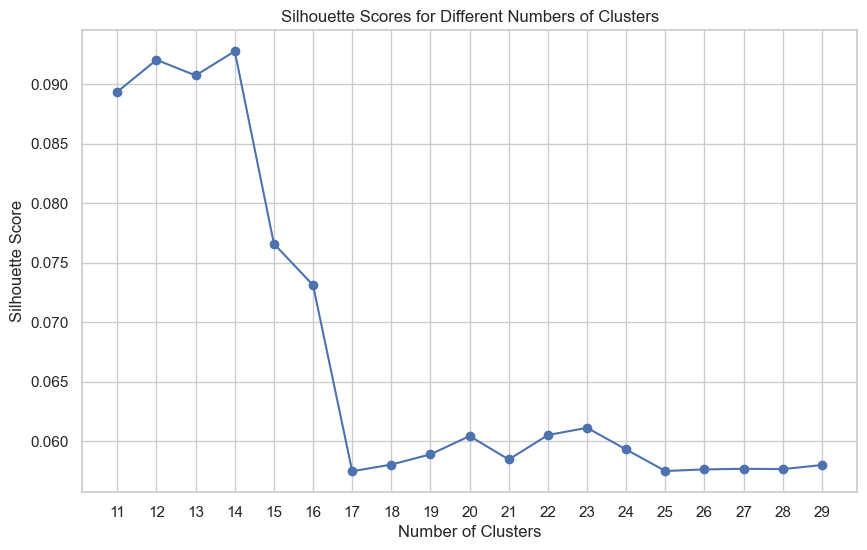

In [24]:
# Suponiendo que X_3_scaled ya está definido y escalado

# Determinar el número óptimo de clusters con Silhouette Score
range_n_clusters = list(range(11, 30))  # Evaluar de 2 a 19 clusters
silhouette_avg = []

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(X_3_scaled)
    cluster_labels = clustering.labels_
    # Calcular el Silhouette Score solo si hay más de un cluster
    if len(set(cluster_labels)) > 1:
        silhouette_avg.append(silhouette_score(X_3_scaled, cluster_labels))
    else:
        silhouette_avg.append(None)  # En caso de que todos los puntos queden en un solo cluster

# Gráfica de Silhouette Scores por número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Configurar ticks del eje X para que solo muestren números enteros
plt.xticks(range_n_clusters)  # Esto asegura que solo se muestren los números enteros en el rango definido

plt.show()

In [25]:
num_clusters = 14

# Realizar la clusterización con el número óptimo de clusters
clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(X_3_scaled)

# Agregar las etiquetas de los clusters al DataFrame original
Data_Players_noGK_3['Cluster - HAglomerative'] = clustering.labels_

# Ahora 'Data_Players_noGK_3' tiene una nueva columna llamada 'Cluster_Labels' con las etiquetas de cluster
# Data_Players_noGK_3['Player', 'Squad', 'Season_End_Year', 'Cluster - HAglomerative'] # Mostrar las primeras filas para verificar

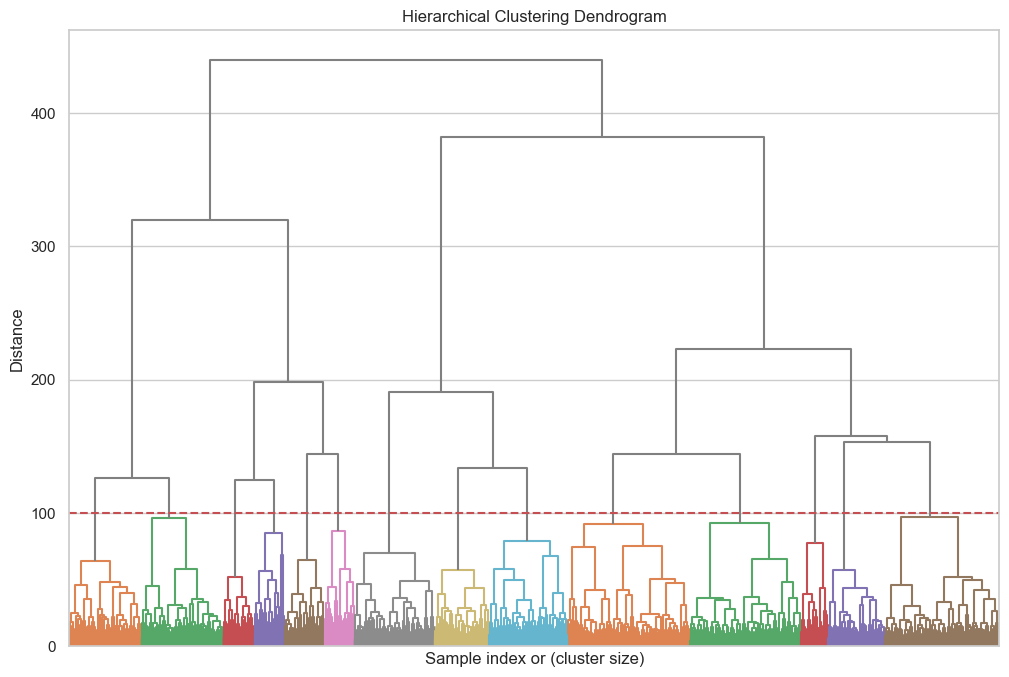

In [26]:
import matplotlib.colors as mcolors

# Generar el enlace para el dendrograma
linked = linkage(X_3_scaled, method='ward')

# Visualizar el dendrograma con el umbral correcto para 14 clusters
plt.figure(figsize=(12, 8))

dendrogram(
    linked,
    orientation='top',
    labels=np.array(Data_Players_noGK_3['Player']),
    distance_sort='ascending',
    show_leaf_counts=True,
    color_threshold=100,  # Usar el threshold calculado
    above_threshold_color='gray',
    # color_discrete_sequence=px.colors.qualitative.Dark24[0:15],
    no_labels=True  # Omitir etiquetas para claridad visual
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.axhline(y=100, color='r', linestyle='--')  # Dibuja la línea de corte
plt.show()

In [27]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_3_scaled)

# Preparar el DataFrame para la visualización
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = Data_Players_noGK_3['Cluster - HAglomerative']
df_pca['Player'] = Data_Players_noGK_3['Player']
df_pca['Season_End_Year'] = Data_Players_noGK_3['Season_End_Year']
df_pca['Squad'] = Data_Players_noGK_3['Squad']

# Crear el gráfico interactivo utilizando la misma paleta de colores
fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', hover_data=['Player', 'Season_End_Year', 'Squad'],
                 title='PCA Projection of Hierarchical Clustering Results', color_continuous_scale=px.colors.qualitative.T10)
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig.show()

In [28]:
import os

Data_Players_noGK["Cluster"] = Data_Players_noGK_3['Cluster - HAglomerative']

# Paso 2: Especificar el directorio y el nombre del archivo
directorio = 'C:/Users/rsier/Desktop/MASTERS/LaSalle - MUDS/TFM/Data/Def_Data/Clustering_Data/'
nombre_archivo = 'Players_noGK_data_clustered.csv'
ruta_completa = os.path.join(directorio, nombre_archivo)

# Paso 3: Exportar el DataFrame a un archivo CSV
Data_Players_noGK.to_csv(ruta_completa, index=False)

In [29]:
Data_Players_noGK.head(10)

Season_End_Year   Squad     Comp             Player Nation Pos  Age  \
0             2018  Alavés  La Liga             Alexis    ESP  DF   31   
1             2018  Alavés  La Liga    Alfonso Pedraza    ESP  MF   21   
2             2018  Alavés  La Liga      Álvaro Medrán    ESP  MF   23   
3             2018  Alavés  La Liga             Burgui    ESP  MF   23   
4             2018  Alavés  La Liga     Carlos Vigaray    ESP  DF   22   
5             2018  Alavés  La Liga      Daniel Torres    COL  MF   27   
6             2018  Alavés  La Liga  Guillermo Maripán    CHI  DF   23   
7             2018  Alavés  La Liga         Ibai Gómez    ESP  MF   27   
8             2018  Alavés  La Liga      John Guidetti    SWE  FW   25   
9             2018  Alavés  La Liga        Manu García    ESP  MF   31   

   Min_Playing.Time_Generales  Min_percent_Playing.Time_Generales  \
0                        2184                                63.9   
1                        2440                                71.3   
2                         947                                27.7   
3                        1034                                30.2   
4                         895                                26.2   
5                        1217                                35.6   
6                        1528                                44.7   
7                        2319                                67.8   
8                        1222                                35.7   
9                        2439                                71.3   

   onxG_Team.Success..xG._Generales  ...  Frac_Att3rd_Touches_Transiciones  \
0                              26.4  ...                          0.099593   
1                              28.6  ...                          0.401310   
2                              10.7  ...                          0.187175   
3                              15.0  ...                          0.453159   
4                               6.8  ...                          0.197216   
5                              14.4  ...                          0.097600   
6                              17.7  ...                          0.024390   
7                              29.6  ...                          0.406100   
8                              13.0  ...                          0.439130   
9                              28.6  ...                          0.141774   

   Frac_AttPen_Touches_Transiciones  Tkl+Int_Defensa  Att_Challenges_Defensa  \
0                          0.031504               63                      45   
1                          0.075772               89                      56   
2                          0.012132               33                      21   
3                          0.052288               17                       6   
4                          0.009281               41                      16   
5                          0.006400               38                      31   
6                          0.018293               64                      32   
7                          0.037721               34                      30   
8                          0.104348                9                      10   
9                          0.023503              130                      89   

   Blocks_Blocks_Defensa  Frac_Def3rd_Tackles_Defensa  \
0                     28                     0.727273   
1                     39                     0.421053   
2                      7                     0.250000   
3                      5                     0.200000   
4                      5                     0.592593   
5                     15                     0.736842   
6                     19                     0.857143   
7                     16                     0.578947   
8                     10                     0.428571   
9                     34                     0.400000   

   Frac_Mid3rd_Tackles_Defensa  Frac_Att3rd_Tackles_Defensa 

## 4. Gausian Mixture Models

In [30]:
Data_Players_noGK_4 = Data_Players_noGK.copy()

In [31]:
# Seleccionar características
X_4_without_OHE = Data_Players_noGK_4.iloc[:, 5:66]
X_4 = apply_one_hot_encoding(X_4_without_OHE)


# Escalar los datos
scaler = StandardScaler()
X_4_scaled = scaler.fit_transform(X_4)

# Seleccionar la columna de etiquetas
y_4 = Data_Players_noGK_4.iloc[:, 0:4]

In [32]:
# Evaluando el número óptimo de componentes
n_components = np.arange(11, 30)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_4_scaled) for n in n_components]

plt.plot(n_components, [m.bic(X_4_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_4_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

silhouette_scores = [silhouette_score(X_4_scaled, GaussianMixture(n, covariance_type='full', random_state=0).fit_predict(X_4))
                     for n in n_components]
plt.plot(n_components, silhouette_scores, "bo-")
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')
plt.show()

KeyboardInterrupt: 

In [ ]:
optimal_n = 24  # Reemplaza con el número óptimo basado en el gráfico anterior

gmm = GaussianMixture(n_components=optimal_n, covariance_type='full', random_state=410)
gmm.fit(X_4_scaled)
labels = gmm.predict(X_4_scaled)
Data_Players_noGK_4['Cluster - GMM'] = labels

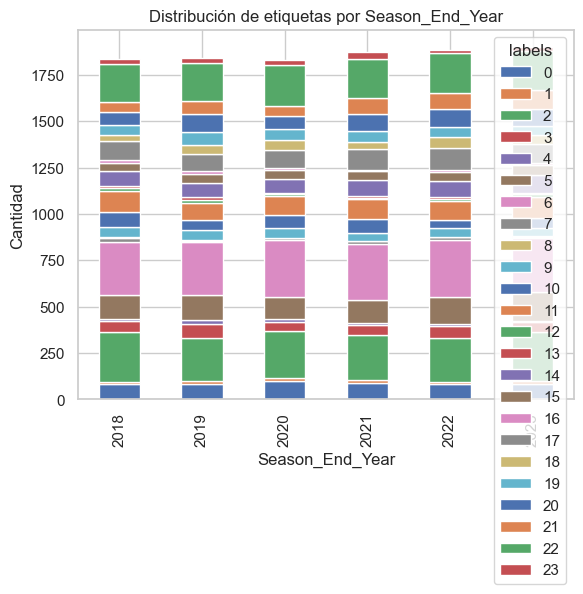

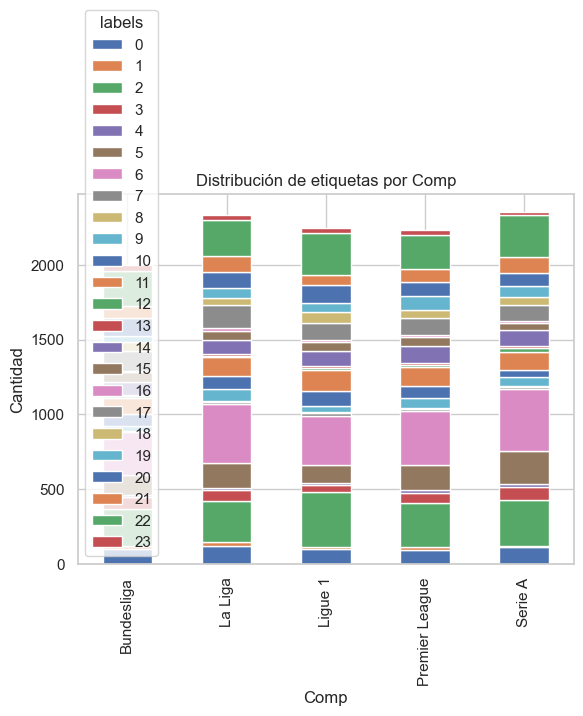

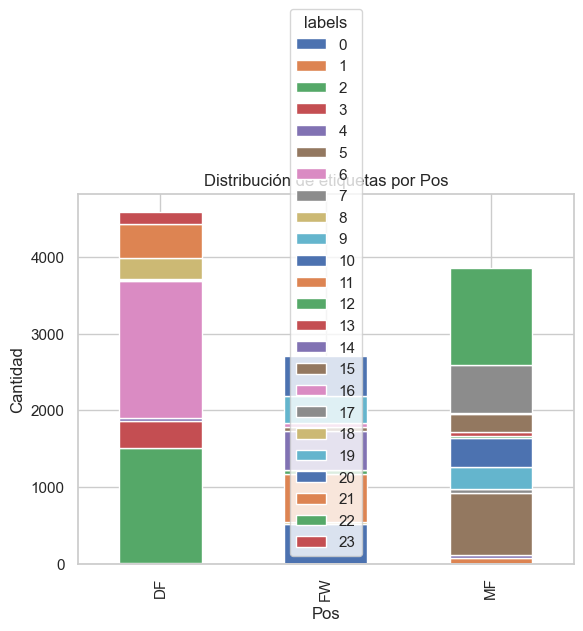

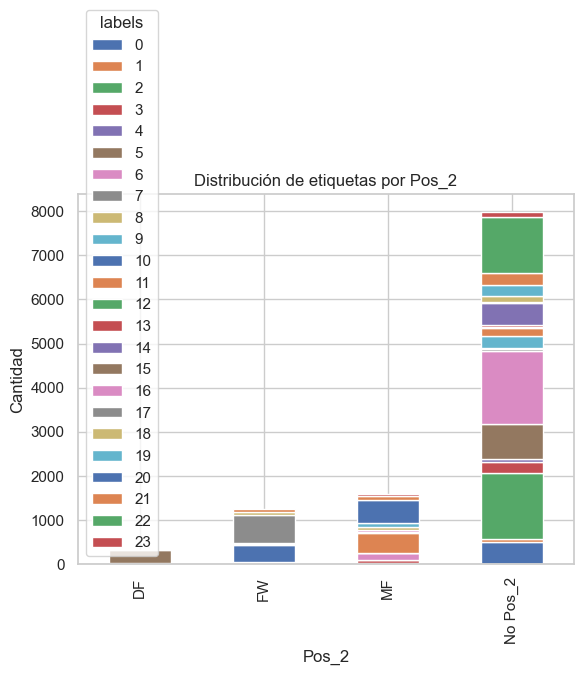

In [ ]:
# Añade las etiquetas al dataframe original para la visualización
Data_Players_noGK_4['labels'] = labels

for var in ['Season_End_Year', 'Comp', 'Pos', 'Pos_2']:
    ct = pd.crosstab(Data_Players_noGK_4[var], Data_Players_noGK_4['labels'])
    ct.plot.bar(stacked=True)
    plt.title('Distribución de etiquetas por ' + var)
    plt.ylabel('Cantidad')
    plt.show()

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_4_scaled)

# Preparar el DataFrame para la visualización
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = Data_Players_noGK_4['Cluster - GMM']
df_pca['Player'] = Data_Players_noGK_4['Player']
df_pca['Season_End_Year'] = Data_Players_noGK_4['Season_End_Year']
df_pca['Squad'] = Data_Players_noGK_4['Squad']

# Crear el gráfico interactivo utilizando la misma paleta de colores
fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', hover_data=['Player', 'Season_End_Year', 'Squad'],
                 title='PCA Projection of Hierarchical Clustering Results', color_continuous_scale=px.colors.qualitative.T10)
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig.show()